## Some misc. code snippets while learning diffusion

In [1]:
%load_ext autoreload

In [2]:
%autoreload
# import libraries
import numpy as np
import pickle as pkl
import os
import sys
import torchvision.utils as vutils

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import torch
%matplotlib inline

from celeba_dataset import CelebA
from unet_diffusion import UNet_Diffusion

In [8]:
%autoreload
import os
import torch
from torch import utils
from torch import nn
import pytorch_lightning as pl
from torchvision import transforms
from torchvision.transforms.v2 import Resize, Compose, ToDtype, RandomHorizontalFlip, RandomVerticalFlip 
from torchvision.transforms.v2 import RandomResizedCrop, RandomRotation, GaussianBlur, RandomErasing


#--------------------------------------------------------------------
# Dataset, Dataloader
#--------------------------------------------------------------------
from pathlib import Path
image_dir_train = Path('../data/img_align_celeba/img_align_celeba/')

img_size = (64,64) 
batch_size = 8 


train_transforms = Compose([ToDtype(torch.float32, scale=False),
                            RandomHorizontalFlip(p=0.50),
                            # RandomVerticalFlip(p=0.25),
                            # transforms.RandomApply(nn.ModuleList([GaussianBlur(kernel_size=7)]), p=0.5),
                            # transforms.RandomApply(nn.ModuleList([RandomRotation(10.0)]), p=0.5),
                            # RandomResizedCrop(size=img_size, scale=(0.3, 1.0), antialias=True),
                            # RandomErasing(p=0.5, scale=(0.02, 0.20)),
                            Resize(img_size, antialias=True)
                            ])

train_dataset = CelebA(image_dir_train, transform=train_transforms)
train_loader = utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle = True, num_workers=5, persistent_workers=True)


Dataset has 202599 rows


In [9]:
class UnNormalize(object):
    def __init__(self) : #, mean, std):
        pass
    def __call__(self, img):
        img = (img*127.5) + 127.5
        return img
    
unorm  = UnNormalize()

In [10]:
imga, imgb = train_dataset.__getitem__(0)
print(imga.shape)

torch.Size([3, 64, 64])


torch.Size([8, 3, 64, 64])
tensor(-0.9984) ,  tensor(0.9185)
num rows: 4 , num cols: 4


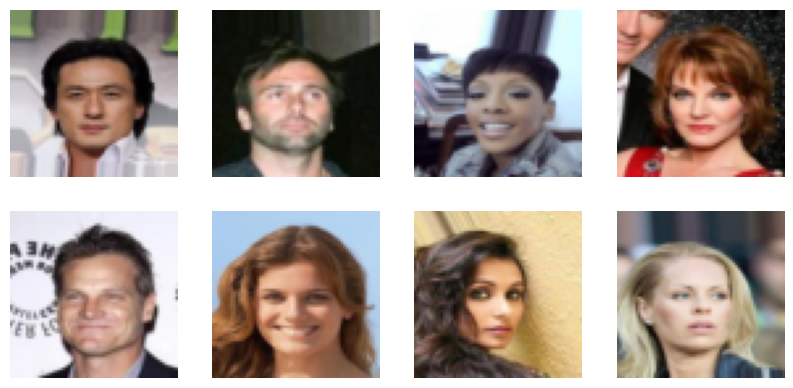

In [12]:
import matplotlib.pyplot as plt

images, _  = next(iter(train_loader))
print(images.shape)
print(torch.min(images[0]), ', ', torch.max(images[0]))


cols = 4
rows = 4
print('num rows:', rows, ', num cols:', cols)
plt.figure(figsize=(10, 10))
idx = 0
for img in (images):  
    img = unorm(img).to(torch.uint8).permute(1, 2, 0)
    # target = unorm(target).to(torch.uint8).permute(1, 2, 0)

    idx += 1
    ax = plt.subplot(rows, cols, idx)
    ax.axis('off')
    plt.imshow(img)

    # idx += 1
    # ax = plt.subplot(rows, cols, idx)
    # ax.axis('off')
    # plt.imshow(target)

    if idx == (cols*rows):
        break

